In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

1. Loading and Preprocessing

In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

2 A. KMeans Clustering

 How KMeans Works:
KMeans is a centroid-based clustering algorithm. It works by:

Selecting k random centroids

Assigning each data point to the closest centroid

Recomputing centroids as the mean of assigned points

Repeating until convergence

Why KMeans for Iris?
Iris dataset has 3 natural classes (though we ignore labels for clustering)

KMeans works well on spherical, well-separated clusters, which the Iris dataset has

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(scaled_data)
df['KMeans_Cluster'] = kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Visualize KMeans Clusters

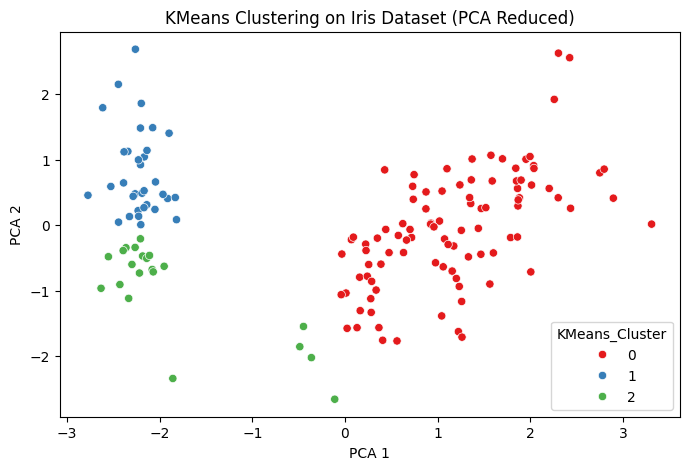

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title("KMeans Clustering on Iris Dataset (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

2 B. Hierarchical Clustering

How Hierarchical Clustering Works:
Builds a dendrogram to show merging/splitting of clusters

Agglomerative approach: starts with individual points and merges clusters step-by-step

Linkage criteria (e.g., ward, complete, average) decide merging rules

Why Hierarchical for Iris?
Doesn't require pre-defining k

Good for visual understanding of the cluster structure

Can show hierarchy and relationships among clusters

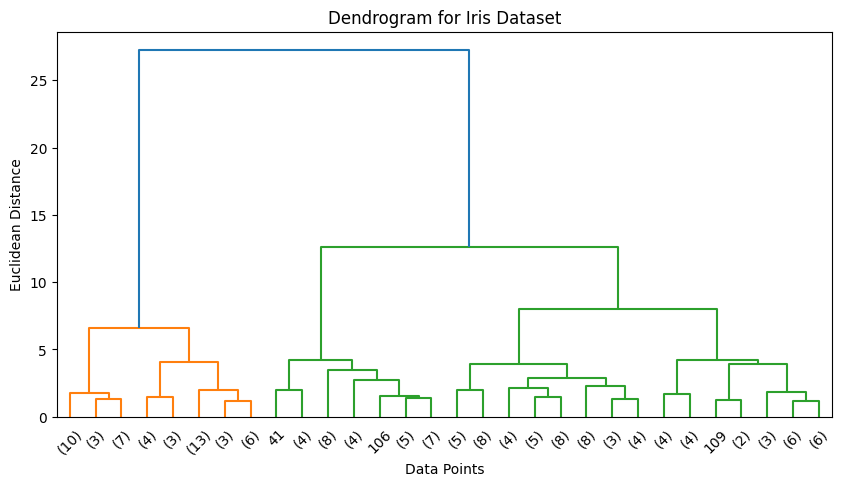

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

link = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(link, truncate_mode='lastp', p=30)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [12]:
df['Hierarchical_Cluster'] = fcluster(link, 3, criterion='maxclust')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),KMeans_Cluster,Hierarchical_Cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,2,1
2,4.7,3.2,1.3,0.2,2,1
3,4.6,3.1,1.5,0.2,2,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,3
146,6.3,2.5,5.0,1.9,0,3
147,6.5,3.0,5.2,2.0,0,3
148,6.2,3.4,5.4,2.3,0,3


 Visualize Hierarchical Clusters

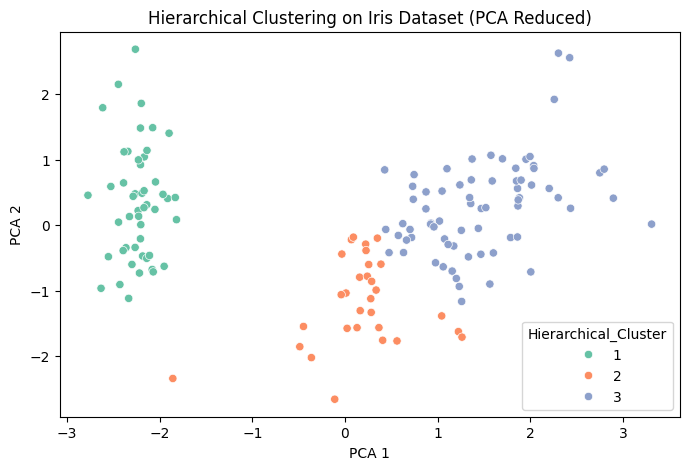

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()